# 1. Importing necessary Libraries

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Reading the datasets

In [123]:
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")
sample=pd.read_csv("sample_submission_49d68Cx.csv")

# 3. EDA

In [125]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


👉 There are 13 variables in this data set,
* 8 categorical variables,
* 4 continuous variables,
* 1 discrete numerical variable

In [128]:
num_cols=train.select_dtypes(include='number').columns.tolist()
cat_cols=train.select_dtypes(include='object').columns.tolist()
print(num_cols)
print(cat_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [129]:
for col in num_cols:
    print(col, train[col].nunique())

ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 203
Loan_Amount_Term 10
Credit_History 2


In [130]:
num_cols.remove('Credit_History')
num_cols.remove('Loan_Amount_Term')
dis_num_cols=[]
dis_num_cols.extend(['Credit_History','Loan_Amount_Term'])
print(num_cols)
print(dis_num_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
['Credit_History', 'Loan_Amount_Term']


## 3.1 Exploring categorical columns

In [132]:
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

#### 3.1.1 Loan_ID

In [134]:
train['Loan_ID'].nunique()

614

👉 It can be seen that there are 614 unique IDs in the dataset. We can say that there is no duplicate rows.

#### 3.1.2 Gender

In [137]:
train.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

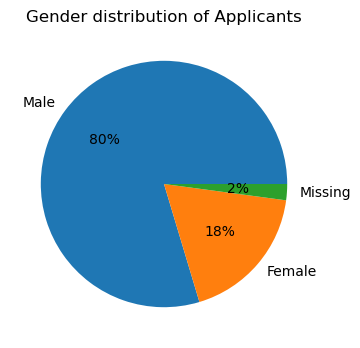

In [138]:
countmale=len(train[train.Gender=='Male'])
countfemale=len(train[train.Gender=='Female'])
countnull=len(train[train.Gender.isnull()])
total=len(train.Gender)
percent_male= (countmale / total) * 100
percent_female= (countfemale / total) * 100
percent_null= (countnull / total) * 100
labels=['Male', 'Female', 'Missing']
sizes=[percent_male, percent_female, percent_null]
plt.figure(figsize=(4,4))
plt.title('Gender distribution of Applicants')
plt.pie(sizes, labels=labels, autopct='%.0f%%')
plt.show()

👉 From the above results, it can be observed that the number of male applicants is higher compared to female applicants.

#### 3.1.3 Married

In [141]:
train.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

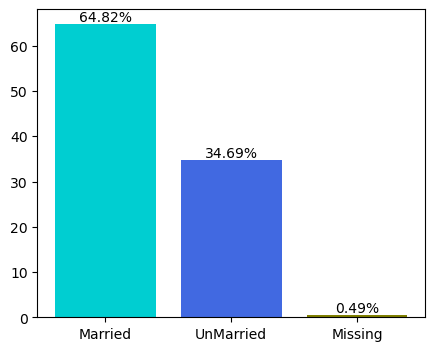

In [142]:
countMarried=len(train[train.Married=='Yes'])
countUnmarried=len(train[train.Married=='No'])
countnull=len(train[train.Married.isnull()])
total=len(train.Married)
percent_Married= (countMarried / total) * 100
percent_Unmarried= (countUnmarried / total) * 100
percent_null= (countnull / total) * 100
labels=['Married', 'UnMarried', 'Missing']
sizes=[percent_Married, percent_Unmarried, percent_null]
plt.figure(figsize=(5,4))
bars=plt.bar(labels, sizes, color=['darkturquoise', 'royalblue', 'olive'])
for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval, f'{yval:.2f}%',  ha='center', va='bottom')

plt.show()

👉 The number of applicants that has been married is higher compared to applicants that hasn't married. 

#### 3.1.4 Dependents

In [145]:
train.Dependents.value_counts(dropna=False)

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64

#### 3.1.5 Education

In [147]:
train.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

👉 The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

#### 3.1.6 Self_Employed

In [150]:
train.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

👉 The number of applicants that are not self employed is higher compared to applicants that are self employed. 

#### 3.1.7 Property_Area

In [153]:
train.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

👉This column has a balanced distribution between Urban, Rural and SemiUrban property area. It also can be seen there is no missing value.

#### 3.1.8 Loan_Status(Target_variable)

In [156]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

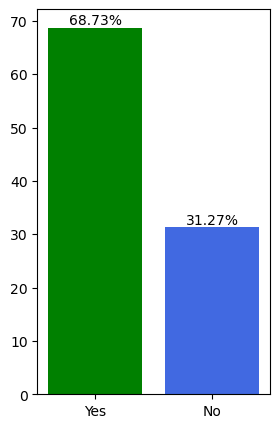

In [157]:
count_yes=len(train[train.Loan_Status=='Y'])
count_no=len(train[train.Loan_Status=='N'])
n=len(train.Loan_Status)
per_yes=(count_yes / n ) *100
per_no=(count_no / n ) *100
labels=['Yes', 'No']
percentages=[per_yes, per_no]
plt.figure(figsize=(3,5))
bars=plt.bar(labels, percentages, color=['green' ,'royalblue'])
for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')
plt.show()

👉 The number of approved loans is higher compared to rejected loans

In [159]:
cat_cols.remove('Loan_Status')
cat_cols.remove('Loan_ID')
for col in cat_cols:
    print(col, ':', train[col].unique())

Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3+' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Property_Area : ['Urban' 'Rural' 'Semiurban']


##### Histplot for cat_cols

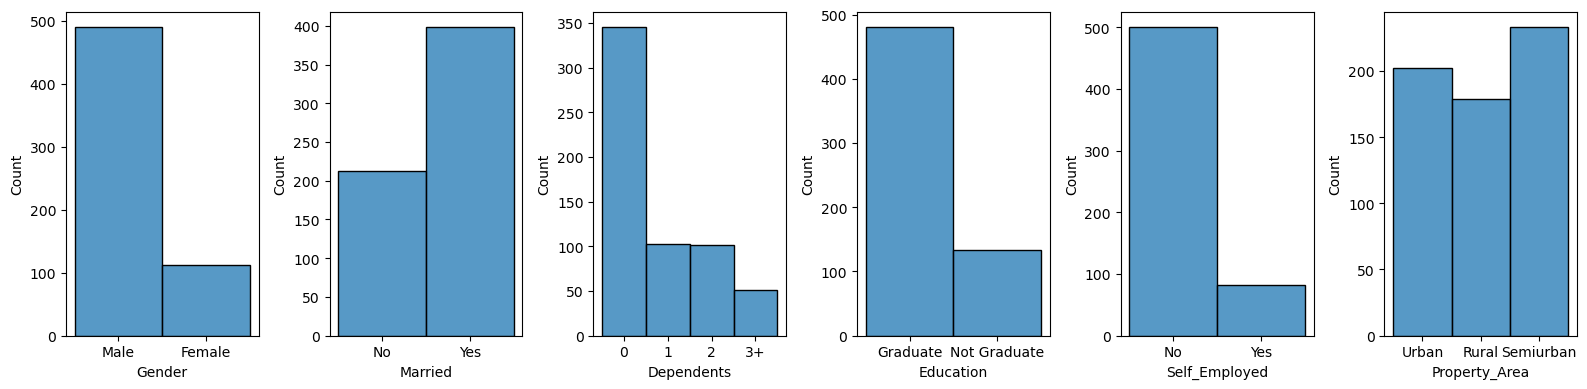

In [161]:
fig, axes=plt.subplots(1, len(cat_cols), figsize=(16,4))
for i, col in enumerate(cat_cols):
    sns.histplot(train[col], ax=axes[i])
plt.tight_layout()
plt.show()

👉 The data shows that more applicants are male, married, have zero dependents, are graduates, not self-employed, live in semiurban and have approved loans compared to their counterparts
👉 All object type columns here are categorical and nomial

##### Distribution of Target variable across categorical columns

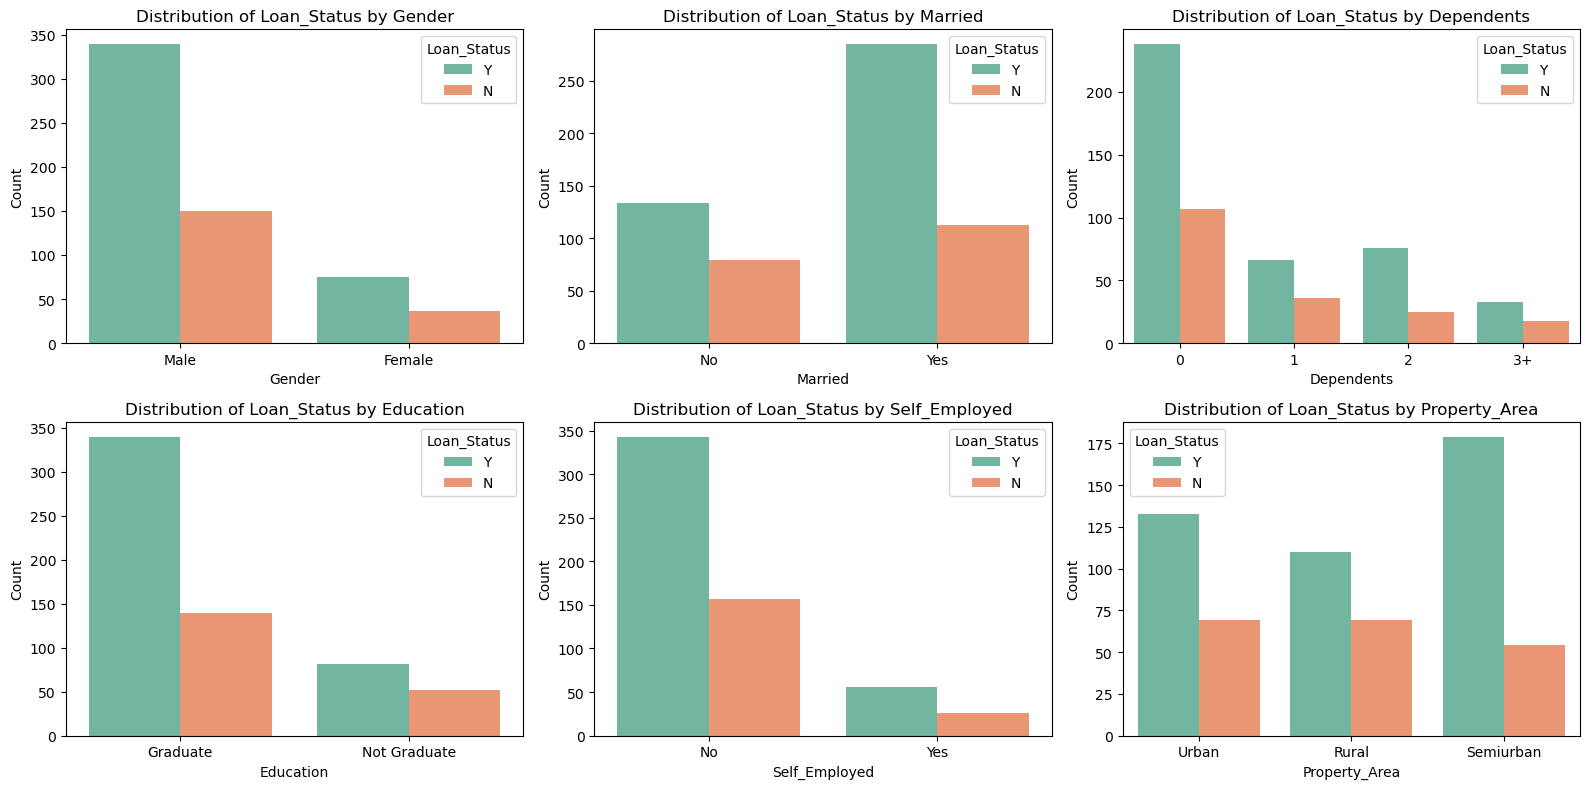

In [164]:
plt.figure(figsize=(16,8))
for i, col in enumerate(cat_cols):
    ax=plt.subplot(2, len(cat_cols)//2, i+1)
    sns.countplot(data=train, x=col, hue='Loan_Status', palette='Set2')
    plt.title(f'Distribution of Loan_Status by {col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

#### Check relationship between categorical variable and target variable using Chi-Square test of independence

In [166]:
from scipy.stats import chi2_contingency
for col in cat_cols:
    contigency_table=pd.crosstab(train[col], train['Loan_Status'])
    chi2, p, dof, expected=chi2_contingency(contigency_table)
    print(f"\nChi-Square Test Results for {col}: ")
    print(f'Chi-Square Statistic: {chi2:.4f}')
    print(f'P-Value: {p:.4f}')


Chi-Square Test Results for Gender: 
Chi-Square Statistic: 0.1396
P-Value: 0.7087

Chi-Square Test Results for Married: 
Chi-Square Statistic: 4.4750
P-Value: 0.0344

Chi-Square Test Results for Dependents: 
Chi-Square Statistic: 3.1583
P-Value: 0.3679

Chi-Square Test Results for Education: 
Chi-Square Statistic: 4.0915
P-Value: 0.0431

Chi-Square Test Results for Self_Employed: 
Chi-Square Statistic: 0.0000
P-Value: 1.0000

Chi-Square Test Results for Property_Area: 
Chi-Square Statistic: 12.2976
P-Value: 0.0021


👉 The Chi-Square Test results show that Married, Education, and Property_Area are significantly associated with Loan_Status, meaning these factors impact loan approval. Whereas Gender, Dependents and Self_Employed do not significantly affect loan status.

In [168]:
significant_features=['Married', 'Education', 'Property_Area']

## 3.2 Exploring discrete numerical columns

In [170]:
dis_num_cols

['Credit_History', 'Loan_Amount_Term']

#### 3.2.1 Credit_History

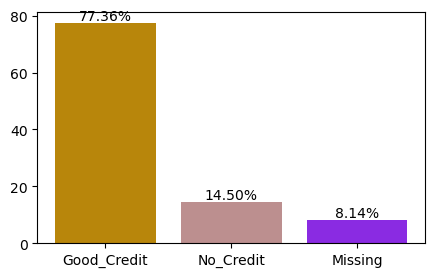

In [172]:
good_credit_his=len(train[train.Credit_History==1])
no_credit_his=len(train[train.Credit_History==0])
countnull=len(train[train.Credit_History.isnull()])
total=len(train['Credit_History'])
percent_credit_his=(good_credit_his/total)*100
percent_no_his=(no_credit_his/total)*100
percent_null=(countnull/total)*100
labels=['Good_Credit', 'No_Credit', 'Missing']
percentages=[percent_credit_his, percent_no_his, percent_null]
plt.figure(figsize=(5,3))
bars=plt.bar(labels, percentages, color=['darkgoldenrod', 'rosybrown', 'blueviolet'])
for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')
plt.show()

👉 The number of applicants that have good credit history is higher compared to applicants that have bad credit history.

#### 3.2.2 Loan_Amount_Term

In [175]:
print(train['Loan_Amount_Term'].unique())

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


In [176]:
print((train['Loan_Amount_Term']//12).unique())

[30. 10. 20. nan 15.  5. 25. 40.  3.  7.  1.]


👉 The above array for Loan_Amount_Term indicates that it is discrete.

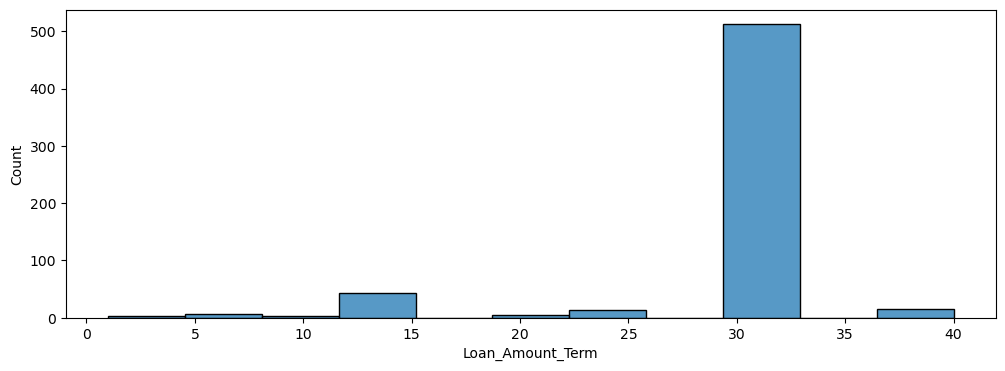

In [178]:
plt.figure(figsize=(12,4))
sns.histplot(train['Loan_Amount_Term']//12)
plt.show()

👉 The majority of the Loan terms are 30 years with 15 years being the second most common

##### Distribution of Target variable across discrete_numerical columns

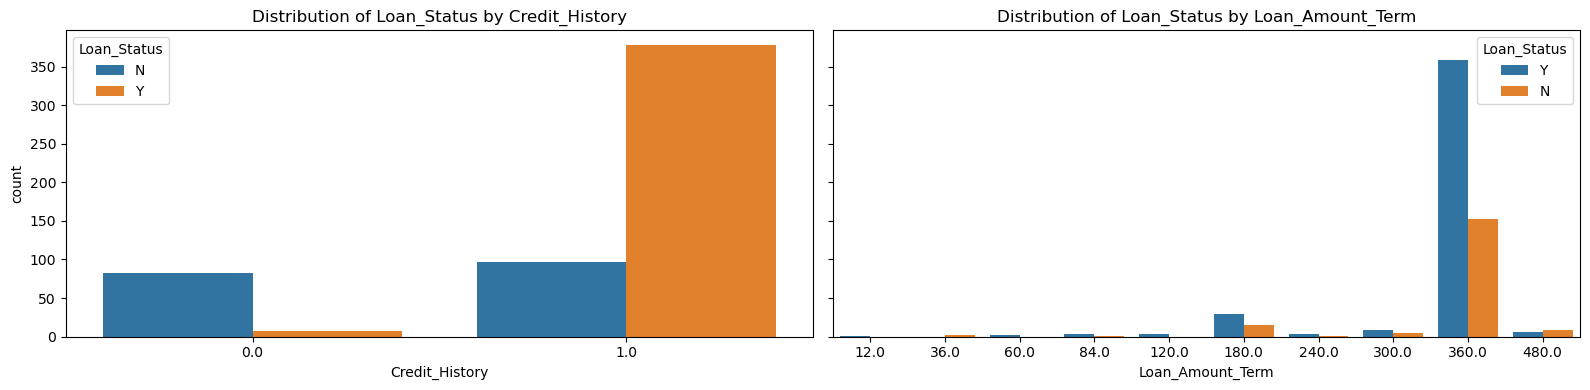

In [181]:
fig, axes=plt.subplots(1, len(dis_num_cols), figsize=(16,4), sharey=True)
for i, col in enumerate(dis_num_cols):
    sns.countplot(data=train, x=col, hue='Loan_Status', ax=axes[i])
    axes[i].set_title(f'Distribution of Loan_Status by {col}')
plt.tight_layout()
plt.show()

👉 Good credit History customer has more approved loans

#### Check relationship between discrete numerical variable and target variable using Chi-Square test of independence

In [184]:
for col in dis_num_cols:
    contigency_table=pd.crosstab(train[col], train['Loan_Status'])
    chi2, p, dof, expected=chi2_contingency(contigency_table)
    print(f"\nChi-Square Test Results for {col}: ")
    print(f'Chi-Square Statistic: {chi2:.4f}')
    print(f'P-Value: {p:.4f}')


Chi-Square Test Results for Credit_History: 
Chi-Square Statistic: 174.6373
P-Value: 0.0000

Chi-Square Test Results for Loan_Amount_Term: 
Chi-Square Statistic: 14.0132
P-Value: 0.1219


In [185]:
significant_features.append('Credit_History')

## 3.3 Continuous Numerical Columns Data Exploration

In [187]:
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [188]:
train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0


#### 3.3.1 ApplicantIncome

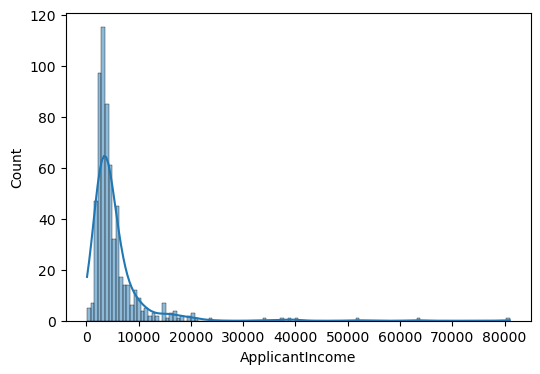

In [190]:
plt.figure(figsize=(6,4))
sns.histplot(x='ApplicantIncome', data=train, kde=True)
plt.show()

👉 The above histogram for ApplicantIncome is positively skewed. It implies that the distribution of ApplicantIncome values is skewed towards higher values.

#### 3.3.2 CoapplicantIncome

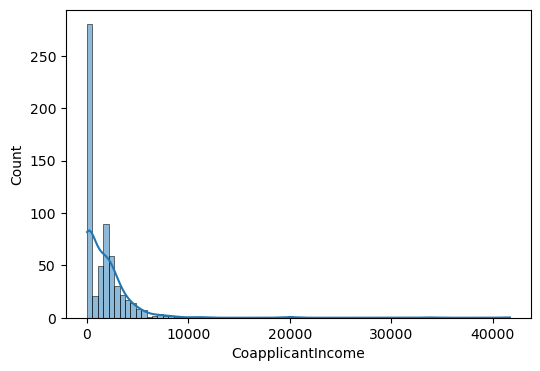

In [193]:
plt.figure(figsize=(6,4))
sns.histplot(x='CoapplicantIncome', data=train, kde=True)
plt.show()

👉 The above histogram for coapplicantIncome is positively skewed. It implies that the distribution of ApplicantIncome values is skewed towards higher values.

#### 3.3.3 Loan_Amount

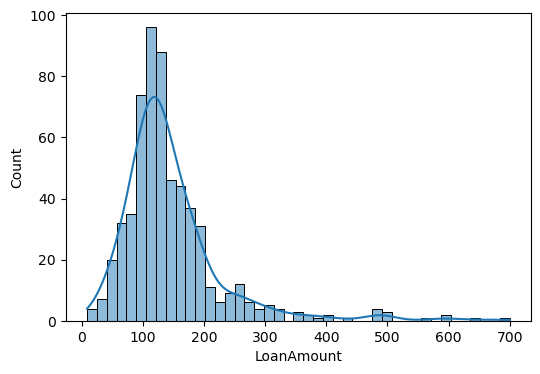

In [196]:
plt.figure(figsize=(6,4))
sns.histplot(x='LoanAmount', data=train, kde=True)
plt.show()

👉 The above histogram for LoanAmount is positively skewed. It implies that the distribution of ApplicantIncome values is skewed towards higher values.

In [198]:
from scipy.stats import ttest_ind
train['Loan_Status']=train['Loan_Status'].map({'Y':1, 'N':0})
for col in num_cols:
    group1 = train[train['Loan_Status'] == 1][col].dropna()
    group2 = train[train['Loan_Status'] == 0][col].dropna()
    t_stat, p_value = ttest_ind(group1, group2)
    print(f"\nT-Test Results for {col}:")
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")


T-Test Results for ApplicantIncome:
T-Statistic: -0.1165
P-Value: 0.9073

T-Test Results for CoapplicantIncome:
T-Statistic: -1.4668
P-Value: 0.1429

T-Test Results for LoanAmount:
T-Statistic: -0.9071
P-Value: 0.3647


In [199]:
corr_matrix=train.corr(numeric_only=True)
corr_matrix.style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


👉 There is a moderate positive correlation indicating that higher applicant incomes are associated with higher loan amounts.
    
👉 Credit History has very weak correlation with all variables (except target) implying that it might be largely independent of these other factors

In [201]:
significant_features.extend(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])
print(significant_features)

['Married', 'Education', 'Property_Area', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


#### 3.3.4 Outlier detection

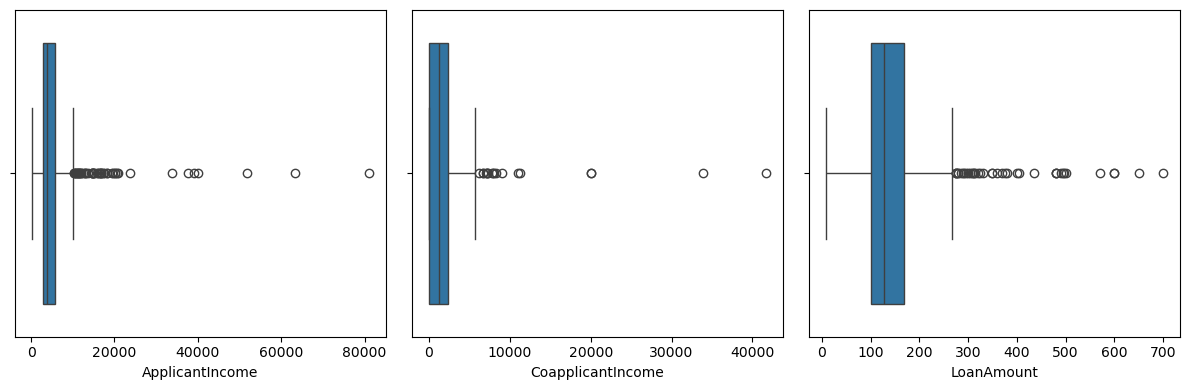

In [203]:
plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=train[col])
plt.tight_layout()
plt.show()

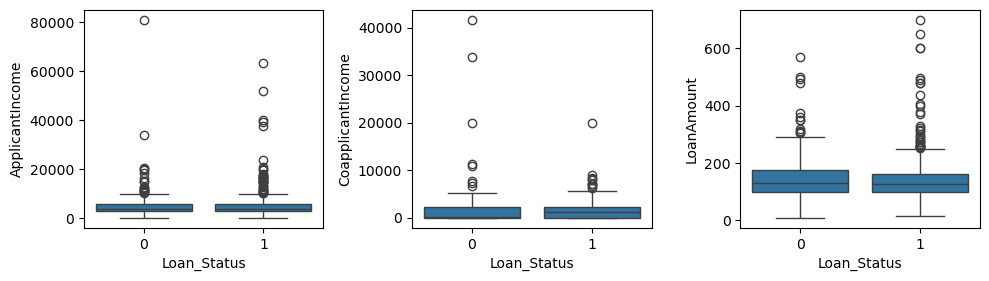

In [204]:
plt.figure(figsize=(10,8))
for i,col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Loan_Status', y=col, data=train)
plt.tight_layout()
plt.show()

## 4. Null Values

In [206]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

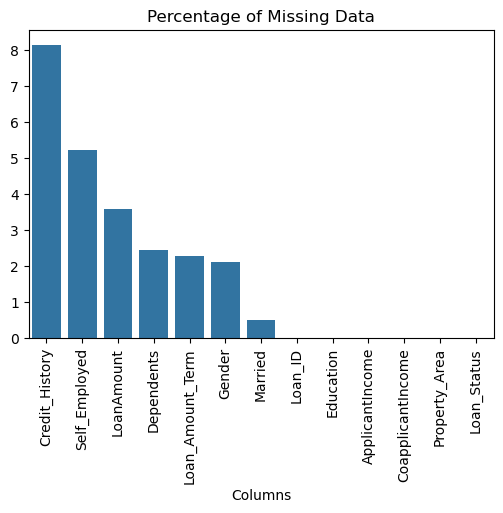

In [207]:
missing_values=(train.isnull().sum())/len(train)*100
msg_percent=missing_values.sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=msg_percent.index, y=msg_percent.values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Data')
plt.xlabel('Columns')
plt.show()

## 5. Data Preprocessing

In [209]:
train.drop('Loan_ID', axis=1, inplace=True)
org_test=test.copy()
test.drop('Loan_ID', axis=1, inplace=True)

In [210]:
print(train.shape, test.shape)

(614, 12) (367, 11)


### 5.1 Feature Engineering

#### 5.1.1 Creating New Features

In [213]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [214]:
train.drop(columns=['ApplicantIncome' , 'CoapplicantIncome'], inplace=True)
test.drop(columns=['ApplicantIncome' , 'CoapplicantIncome'], inplace=True)

In [215]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0


In [216]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            601 non-null    object 
 1   Married           611 non-null    object 
 2   Dependents        599 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     582 non-null    object 
 5   LoanAmount        592 non-null    float64
 6   Loan_Amount_Term  600 non-null    float64
 7   Credit_History    564 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    int64  
 10  Total_Income      614 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


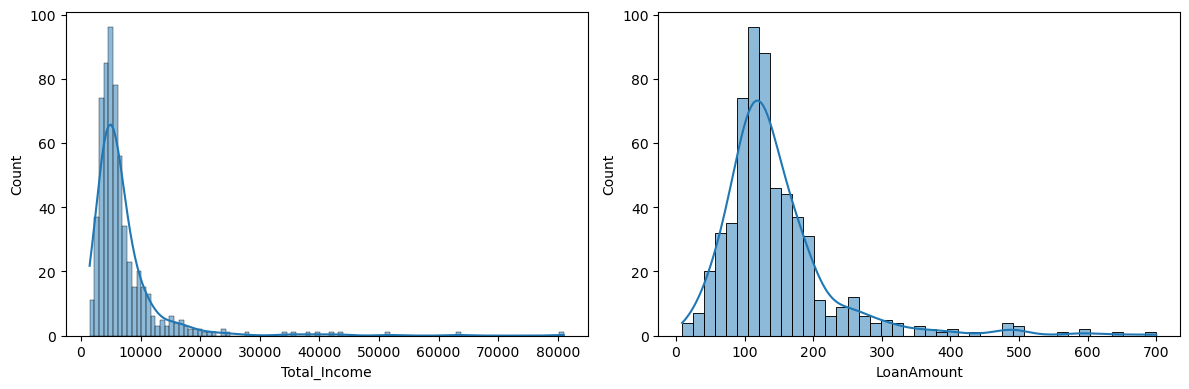

In [217]:
num_cols=['Total_Income', 'LoanAmount']
fig, axes=plt.subplots(1, len(num_cols), figsize=(12,4))
for i, col in enumerate(num_cols):
    sns.histplot(train[col], kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

Since distribution for Total_Income and LoanAmount is positively skewed we need to treat this

##### Log Transformation

In [220]:
train['LoanAmount_Log']=np.log1p(train['LoanAmount'])
train['Total_Income_Log']=np.log1p(train['Total_Income'])
num_cols.extend(['LoanAmount_Log', 'Total_Income_Log'])

In [221]:
num_cols

['Total_Income', 'LoanAmount', 'LoanAmount_Log', 'Total_Income_Log']

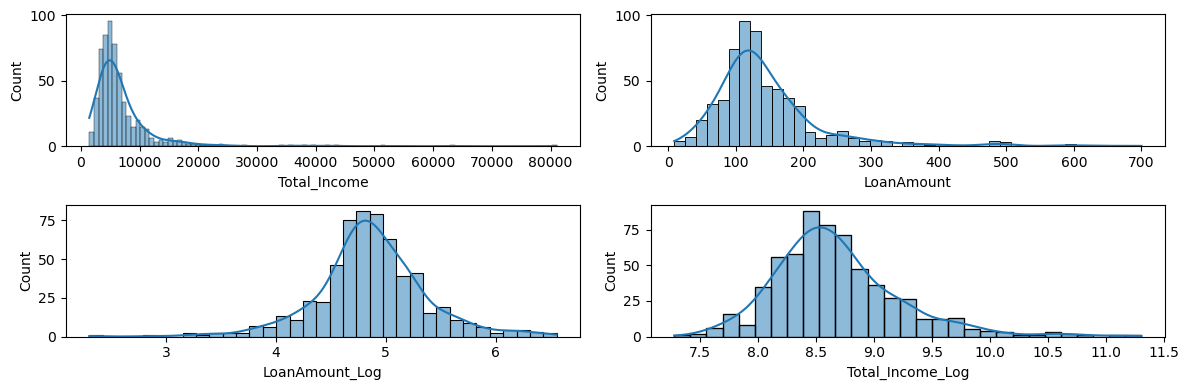

In [222]:
fig, axes=plt.subplots(2, len(num_cols)//2, figsize=(12,4))
axes=axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(train[col], kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

AS can be seen the distribution after using log transformation are much better  compared to original distribution.

##### Square Root Transformation

In [225]:
train['LoanAmount_sqrt']=np.sqrt(train['LoanAmount'])
train['Total_Income_sqrt']=np.sqrt(train['Total_Income'])
num_cols.extend(['LoanAmount_sqrt', 'Total_Income_sqrt'])

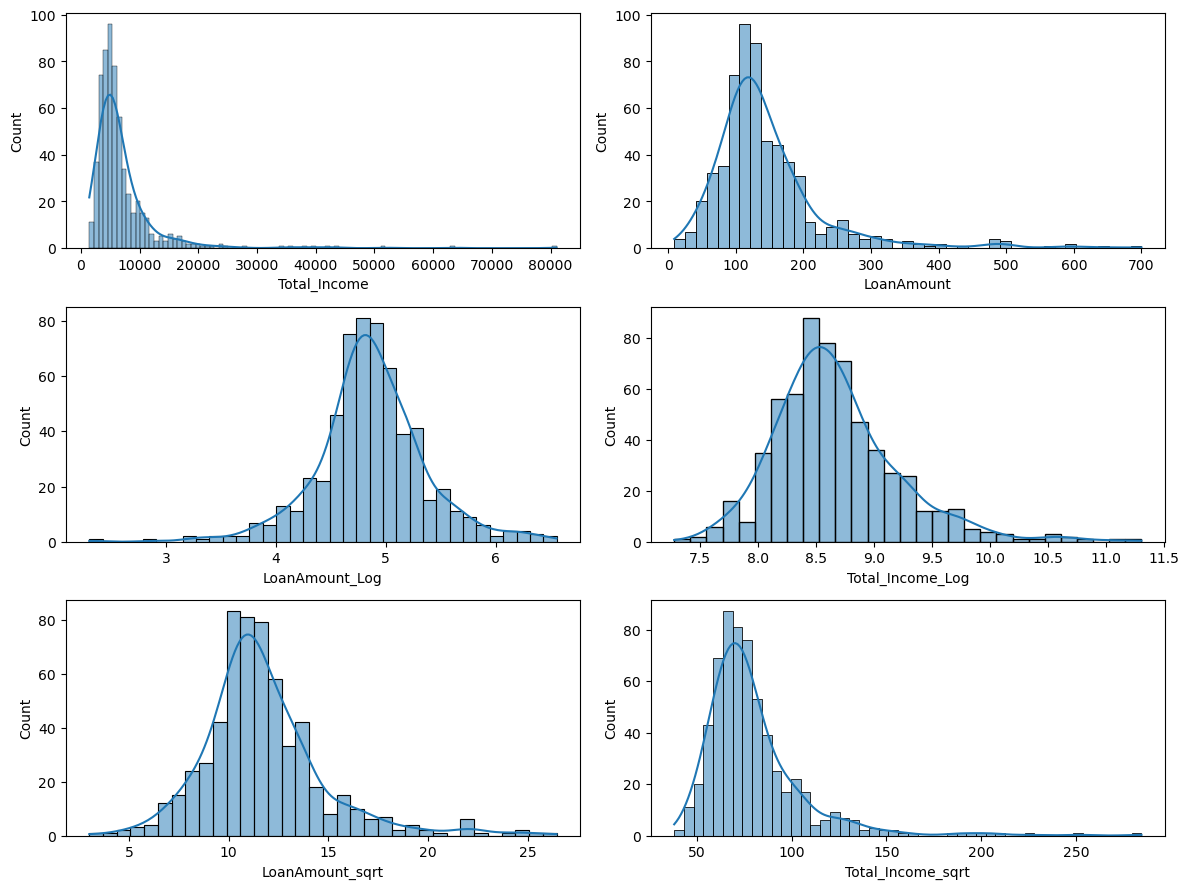

In [226]:
fig, axes=plt.subplots(3, 2, figsize=(12,9))
axes=axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(train[col], kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

In [227]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Total_Income', 'LoanAmount_Log', 'Total_Income_Log',
       'LoanAmount_sqrt', 'Total_Income_sqrt'],
      dtype='object')

In [228]:
train.drop(columns=['LoanAmount', 'Total_Income','LoanAmount_sqrt', 'Total_Income_sqrt' ], inplace=True)
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_Log', 'Total_Income_Log'],
      dtype='object')

In [229]:
test['LoanAmount_Log']=np.log1p(test['LoanAmount'])
test['Total_Income_Log']=np.log1p(test['Total_Income'])
test.drop(columns=['LoanAmount', 'Total_Income'], inplace=True)
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_Log',
       'Total_Income_Log'],
      dtype='object')

In [230]:
train=train.rename(columns={'LoanAmount_Log': 'LoanAmount'})
train=train.rename(columns={'Total_Income_Log': 'Total_Income'})
test=test.rename(columns={'LoanAmount_Log': 'LoanAmount'})
test=test.rename(columns={'Total_Income_Log': 'Total_Income'})

## 5.2 Handling Missing Values

In [232]:
print(cat_cols, dis_num_cols, num_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'] ['Credit_History', 'Loan_Amount_Term'] ['Total_Income', 'LoanAmount', 'LoanAmount_Log', 'Total_Income_Log', 'LoanAmount_sqrt', 'Total_Income_sqrt']


##### Categorical Columns Imputation

In [234]:
for col in (cat_cols+dis_num_cols):
    train[col]=train[col].fillna(train[col].dropna().mode().values[0])
    test[col]=test[col].fillna(test[col].dropna().mode().values[0])
train.isnull().sum()    

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount          22
Total_Income         0
dtype: int64

In [235]:
test.isnull().sum()  

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
LoanAmount          5
Total_Income        0
dtype: int64

##### Numerical Columns Imputation

In [237]:
num_cols=['LoanAmount', 'Total_Income']
for col in num_cols:
    train[col]=train[col].fillna(train[col].dropna().median())
    test[col]=test[col].fillna(test[col].dropna().median())
train.isnull().sum()    

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
LoanAmount          0
Total_Income        0
dtype: int64

## 5.3 Encoding

In [290]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le=LabelEncoder()
    train[col]=le.fit_transform(train[col])
    test[col]=le.transform(test[col])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount,Total_Income
0,1,0,0,0,0,360.0,1.0,2,1,4.859812,8.674197
1,1,1,1,0,0,360.0,1.0,0,0,4.859812,8.714732
2,1,1,0,0,1,360.0,1.0,2,1,4.204693,8.006701
3,1,1,0,1,0,360.0,1.0,2,1,4.795791,8.505525
4,1,0,0,0,0,360.0,1.0,2,1,4.955827,8.699681


## 5.4 Outliers Removal

In [297]:
from scipy import stats
z_scores=stats.zscore(train)
abs_scores=np.abs(z_scores)
filtered_rows=(abs_scores<3).all(axis=1)
df=train[filtered_rows]
print("Original size", train.shape)
print("After removing Outliers", df.shape)

Original size (614, 11)
After removing Outliers (588, 11)


## 5.5 Normalizing the data

In [300]:
from sklearn.preprocessing import MinMaxScaler
train_new=train.drop(columns=['Loan_Status'])
scaler=MinMaxScaler()
train_df=pd.DataFrame(scaler.fit_transform(train_new), columns=train_new.columns)
test_df=pd.DataFrame(scaler.transform(test), columns=test.columns)
train_df['Loan_Status']=train['Loan_Status']
print(train_df.head())

   Gender  Married  Dependents  Education  Self_Employed  Loan_Amount_Term  \
0     1.0      0.0    0.000000        0.0            0.0           0.74359   
1     1.0      1.0    0.333333        0.0            0.0           0.74359   
2     1.0      1.0    0.000000        0.0            1.0           0.74359   
3     1.0      1.0    0.000000        1.0            0.0           0.74359   
4     1.0      0.0    0.000000        0.0            0.0           0.74359   

   Credit_History  Property_Area  LoanAmount  Total_Income  Loan_Status  
0             1.0            1.0    0.601711      0.347520            1  
1             1.0            0.0    0.601711      0.357583            0  
2             1.0            1.0    0.447563      0.181795            1  
3             1.0            1.0    0.586647      0.305642            1  
4             1.0            1.0    0.624304      0.353847            1  


In [302]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount,Total_Income
0,1.0,1.0,0.000000,0.0,0.0,0.74359,1.0,1.0,0.566350,0.341983
1,1.0,1.0,0.333333,0.0,0.0,0.74359,1.0,1.0,0.598035,0.286593
2,1.0,1.0,0.666667,0.0,0.0,0.74359,1.0,1.0,0.715248,0.384917
3,1.0,1.0,0.666667,0.0,0.0,0.74359,1.0,1.0,0.544136,0.302863
4,1.0,0.0,0.000000,1.0,0.0,0.74359,1.0,1.0,0.486329,0.203639


In [304]:
print(train_df.shape, test_df.shape)

(614, 11) (367, 10)


## Saving the Preprocessed Files

In [307]:
train_df.to_csv("Preprocessed_train", index=False)
test_df.to_csv("Preprocessed_test", index=False)
print("Preprocessed Files are saved successfully")

Preprocessed Files are saved successfully
